<a href="https://colab.research.google.com/github/merls0515/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the stock price data
print("Loading Stock Price Dataset...")
df_stock = pd.read_csv('StockPrice.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock = df_stock.sort_values('Date').reset_index(drop=True)

print(f"Stock Dataset Shape: {df_stock.shape}")
print(f"Date Range: {df_stock['Date'].min()} to {df_stock['Date'].max()}")
print("\nFirst 5 rows:")
print(df_stock.head())
print("\nDataset Info:")
print(df_stock.info())
print("\nDescriptive Statistics:")
print(df_stock['Price'].describe())

Loading Stock Price Dataset...
Stock Dataset Shape: (3839, 2)
Date Range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00

First 5 rows:
        Date    Price
0 2010-01-04  1178.00
1 2010-01-05  1181.50
2 2010-01-06  1182.25
3 2010-01-07  1186.75
4 2010-01-08  1190.75

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3839 non-null   datetime64[ns]
 1   Price   3839 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.1 KB
None

Descriptive Statistics:
count    3839.000000
mean     2997.357020
std      1343.596346
min      1072.500000
25%      1939.375000
50%      2754.500000
75%      4217.000000
max      6163.000000
Name: Price, dtype: float64


In [3]:
data = pd.read_csv("/content/Data.csv")
stock = pd.read_csv("/content/StockPrice.csv")

data.head(), stock.head()


(         Date   Data
 0  2025-03-26  2.369
 1  2025-03-25  2.365
 2  2025-03-24  2.367
 3  2025-03-21  2.386
 4  2025-03-20  2.387,
          Date    Price
 0  2025-03-26  5759.50
 1  2025-03-25  5826.50
 2  2025-03-24  5815.50
 3  2025-03-21  5718.25
 4  2025-03-20  5712.75)


EXPLORATORY DATA ANALYSIS: Stock Price Dataset

1. BASIC STATISTICS:
   - Number of observations: 3839
   - Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
   - Missing values: 0

2. PRICE STATISTICS:
   - Mean price: $2997.36
   - Median price: $2754.50
   - Standard deviation: $1343.60
   - Minimum price: $1072.50
   - Maximum price: $6163.00

3. YEARLY ANALYSIS:
             mean         std      min      max
Year                                           
2010  1194.365810   58.920977  1072.50  1324.00
2011  1341.428770   58.922449  1171.00  1432.75
2012  1489.833004   65.977619  1362.75  1624.75
2013  1833.322421  106.142168  1636.00  2049.25
2014  2147.424603   88.282307  1941.00  2323.25
2015  2307.884387   53.456969  2125.50  2376.25
2016  2376.531746  110.688784  2097.00  2570.00
2017  2753.437251  112.651928  2554.75  3000.75
2018  3046.018849  101.126237  2631.75  3231.75
2019  3197.260913  147.130439  2737.75  3519.25
2020  3507.426877  328.904910  2509.50  4066.25


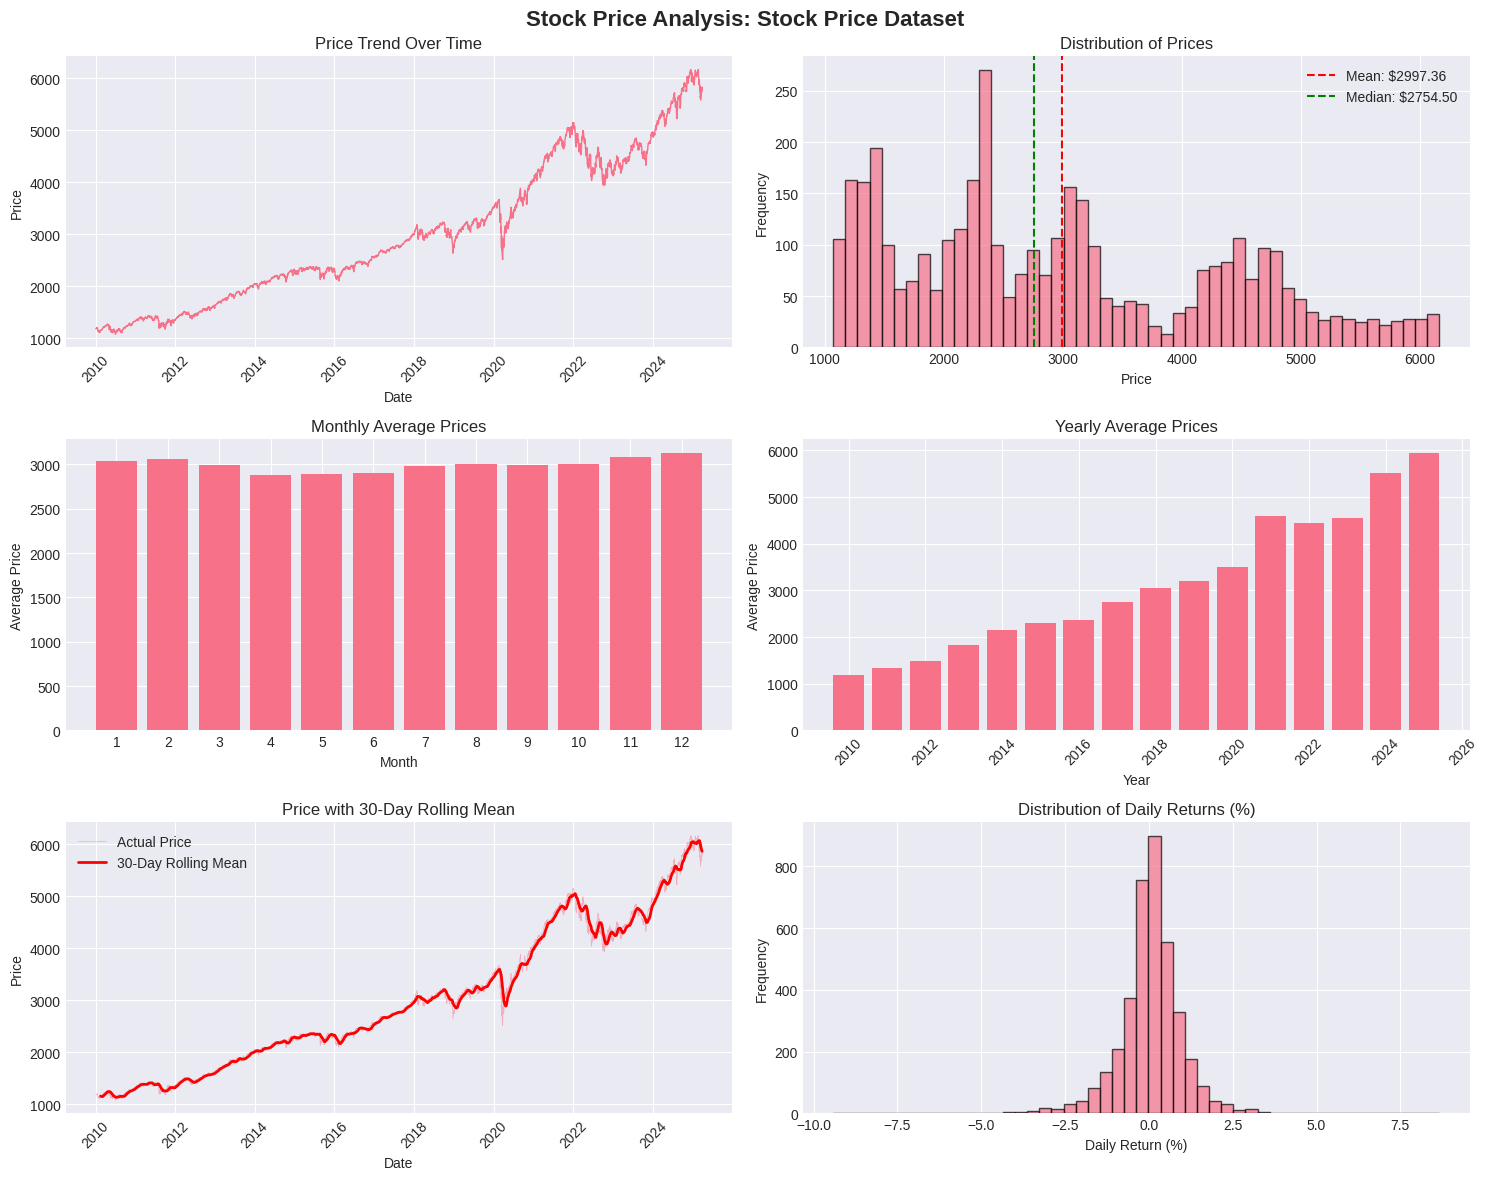


4. KEY METRICS:
   - Average daily return: 0.0463%
   - Volatility (std of returns): 0.9908%
   - Maximum daily gain: 8.6671%
   - Maximum daily loss: -9.4168%
   - Correlation with time: 0.9715


In [18]:
def exploratory_data_analysis(df, title):
    """Perform comprehensive EDA on the dataset"""

    print(f"\n{'='*60}")
    print(f"EXPLORATORY DATA ANALYSIS: {title}")
    print(f"{'='*60}")

    # 1. Basic Statistics
    print("\n1. BASIC STATISTICS:")
    print(f"   - Number of observations: {len(df)}")
    print(f"   - Date range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"   - Missing values: {df.isnull().sum().sum()}")

    # 2. Price Statistics
    print("\n2. PRICE STATISTICS:")
    print(f"   - Mean price: ${df['Price'].mean():.2f}")
    print(f"   - Median price: ${df['Price'].median():.2f}")
    print(f"   - Standard deviation: ${df['Price'].std():.2f}")
    print(f"   - Minimum price: ${df['Price'].min():.2f}")
    print(f"   - Maximum price: ${df['Price'].max():.2f}")

    # 3. Yearly Analysis
    df['Year'] = df['Date'].dt.year
    yearly_stats = df.groupby('Year')['Price'].agg(['mean', 'std', 'min', 'max'])
    print("\n3. YEARLY ANALYSIS:")
    print(yearly_stats)

    # 4. Monthly Analysis
    df['Month'] = df['Date'].dt.month
    monthly_stats = df.groupby('Month')['Price'].mean()

    # 5. Create visualizations
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(f'Stock Price Analysis: {title}', fontsize=16, fontweight='bold')

    # Price trend over time
    axes[0, 0].plot(df['Date'], df['Price'], linewidth=1)
    axes[0, 0].set_title('Price Trend Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Distribution of prices
    axes[0, 1].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Distribution of Prices')
    axes[0, 1].set_xlabel('Price')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Price"].mean():.2f}')
    axes[0, 1].axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: ${df["Price"].median():.2f}')
    axes[0, 1].legend()

    # Monthly average prices
    monthly_avg = df.groupby('Month')['Price'].mean()
    axes[1, 0].bar(monthly_avg.index, monthly_avg.values)
    axes[1, 0].set_title('Monthly Average Prices')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Average Price')
    axes[1, 0].set_xticks(range(1, 13))

    # Yearly average prices
    yearly_avg = df.groupby('Year')['Price'].mean()
    axes[1, 1].bar(yearly_avg.index, yearly_avg.values)
    axes[1, 1].set_title('Yearly Average Prices')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Average Price')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Rolling statistics
    rolling_mean = df['Price'].rolling(window=30).mean()
    rolling_std = df['Price'].rolling(window=30).std()

    axes[2, 0].plot(df['Date'], df['Price'], alpha=0.5, label='Actual Price', linewidth=0.5)
    axes[2, 0].plot(df['Date'], rolling_mean, 'r-', label='30-Day Rolling Mean', linewidth=2)
    axes[2, 0].set_title('Price with 30-Day Rolling Mean')
    axes[2, 0].set_xlabel('Date')
    axes[2, 0].set_ylabel('Price')
    axes[2, 0].legend()
    axes[2, 0].tick_params(axis='x', rotation=45)

    # Price changes
    df['Daily_Return'] = df['Price'].pct_change() * 100
    axes[2, 1].hist(df['Daily_Return'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[2, 1].set_title('Distribution of Daily Returns (%)')
    axes[2, 1].set_xlabel('Daily Return (%)')
    axes[2, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # 6. Calculate and display key metrics
    print("\n4. KEY METRICS:")
    print(f"   - Average daily return: {df['Daily_Return'].mean():.4f}%")
    print(f"   - Volatility (std of returns): {df['Daily_Return'].std():.4f}%")
    print(f"   - Maximum daily gain: {df['Daily_Return'].max():.4f}%")
    print(f"   - Maximum daily loss: {df['Daily_Return'].min():.4f}%")

    # 7. Correlation with time
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days
    correlation = df['Days'].corr(df['Price'])
    print(f"   - Correlation with time: {correlation:.4f}")

    return df

# Perform EDA on stock data
df_stock = exploratory_data_analysis(df_stock, "Stock Price Dataset")


FEATURE ENGINEERING
Original shape: (3839, 40)
After cleaning: (3809, 40)
Number of features created: 40


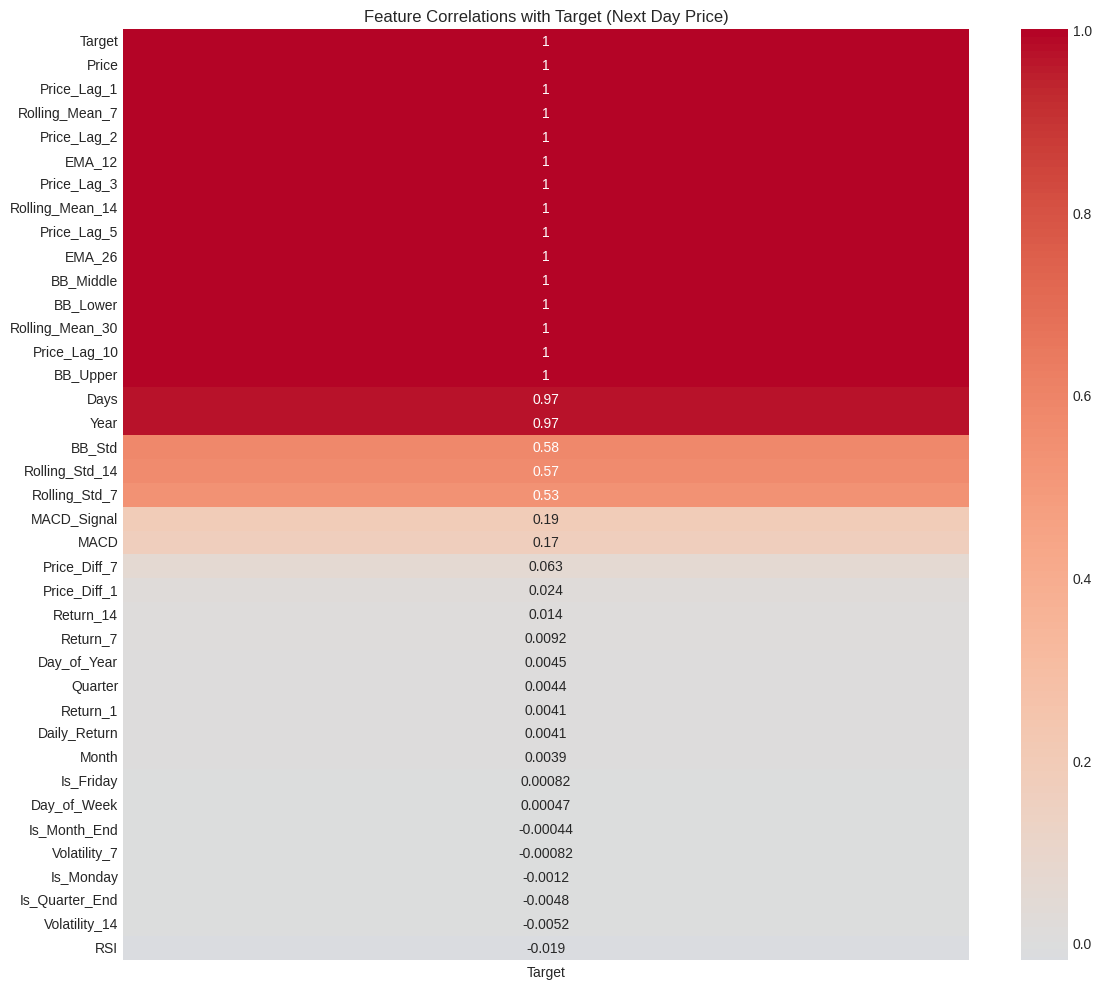


Sample of engineered features:
         Date    Price   Target  Price_Lag_1  Rolling_Mean_7        RSI  \
29 2010-02-16  1142.50  1148.75      1128.25     1119.835714  52.105263   
30 2010-02-17  1148.75  1154.75      1142.50     1125.514286  51.766784   
31 2010-02-18  1154.75  1155.50      1148.75     1132.585714  59.924386   
32 2010-02-19  1155.50  1156.75      1154.75     1138.300000  64.386318   
33 2010-02-22  1156.75  1146.50      1155.50     1144.621429  59.681093   
34 2010-02-23  1146.50  1152.75      1156.75     1147.571429  50.000000   
35 2010-02-24  1152.75  1151.50      1146.50     1151.071429  53.056769   
36 2010-02-25  1151.50  1152.75      1152.75     1152.357143  75.000000   
37 2010-02-26  1152.75  1163.75      1151.50     1152.928571  77.258567   
38 2010-03-01  1163.75  1166.75      1152.75     1154.214286  83.428571   

         MACD  
29 -12.325045  
30  -9.872106  
31  -7.359153  
32  -5.246621  
33  -3.431997  
34  -2.788837  
35  -1.754579  
36  -1.023983 

In [19]:
def create_features(df):
    """Create technical indicators and features for prediction"""

    print(f"\n{'='*60}")
    print("FEATURE ENGINEERING")
    print(f"{'='*60}")

    # Create lag features
    for lag in [1, 2, 3, 5, 10]:
        df[f'Price_Lag_{lag}'] = df['Price'].shift(lag)

    # Create rolling statistics
    df['Rolling_Mean_7'] = df['Price'].rolling(window=7).mean()
    df['Rolling_Mean_14'] = df['Price'].rolling(window=14).mean()
    df['Rolling_Mean_30'] = df['Price'].rolling(window=30).mean()

    df['Rolling_Std_7'] = df['Price'].rolling(window=7).std()
    df['Rolling_Std_14'] = df['Price'].rolling(window=14).std()

    # Create price differences
    df['Price_Diff_1'] = df['Price'].diff(1)
    df['Price_Diff_7'] = df['Price'].diff(7)

    # Create percentage changes
    for period in [1, 7, 14]:
        df[f'Return_{period}'] = df['Price'].pct_change(period)

    # Create volatility
    df['Volatility_7'] = df['Return_1'].rolling(window=7).std()
    df['Volatility_14'] = df['Return_1'].rolling(window=14).std()

    # Create moving average convergence divergence (MACD)
    df['EMA_12'] = df['Price'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Price'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Create Bollinger Bands
    df['BB_Middle'] = df['Price'].rolling(window=20).mean()
    df['BB_Std'] = df['Price'].rolling(window=20).std()
    df['BB_Upper'] = df['BB_Middle'] + (df['BB_Std'] * 2)
    df['BB_Lower'] = df['BB_Middle'] - (df['BB_Std'] * 2)

    # Create RSI (Relative Strength Index)
    delta = df['Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Create time-based features
    df['Day_of_Week'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
    df['Year'] = df['Date'].dt.year
    df['Day_of_Year'] = df['Date'].dt.dayofyear

    # Create binary features
    df['Is_Monday'] = (df['Day_of_Week'] == 0).astype(int)
    df['Is_Friday'] = (df['Day_of_Week'] == 4).astype(int)
    df['Is_Month_End'] = (df['Date'].dt.is_month_end).astype(int)
    df['Is_Quarter_End'] = (df['Date'].dt.is_quarter_end).astype(int)

    # Create target variable (next day's price)
    df['Target'] = df['Price'].shift(-1)

    # Drop rows with NaN values
    df_clean = df.dropna().copy()

    print(f"Original shape: {df.shape}")
    print(f"After cleaning: {df_clean.shape}")
    print(f"Number of features created: {len(df_clean.columns)}")

    # Display feature correlations
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    correlation_matrix = df_clean[numeric_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix[['Target']].sort_values('Target', ascending=False),
                annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlations with Target (Next Day Price)')
    plt.tight_layout()
    plt.show()

    return df_clean

# Apply feature engineering
df_features = create_features(df_stock)
print(f"\nSample of engineered features:")
print(df_features[['Date', 'Price', 'Target', 'Price_Lag_1', 'Rolling_Mean_7', 'RSI', 'MACD']].head(10))


PREDICTIVE MODELING
Number of features: 37
Features: ['Year', 'Month', 'Daily_Return', 'Days', 'Price_Lag_1', 'Price_Lag_2', 'Price_Lag_3', 'Price_Lag_5', 'Price_Lag_10', 'Rolling_Mean_7']...

Data Split:
Training set: 3047 samples (80.0%)
Testing set: 762 samples (20.0%)

----------------------------------------
Training Linear Regression...
Train MSE: 666.7007
Test MSE: 2344.0579
Train MAE: 16.1288
Test MAE: 36.9713
Train R²: 0.9993
Test R²: 0.9939

----------------------------------------
Training Ridge Regression...
Train MSE: 697.9228
Test MSE: 2384.5025
Train MAE: 16.4008
Test MAE: 37.4561
Train R²: 0.9993
Test R²: 0.9938

----------------------------------------
Training Lasso Regression...
Train MSE: 681.3394
Test MSE: 2310.6653
Train MAE: 16.0919
Test MAE: 36.4263
Train R²: 0.9993
Test R²: 0.9940

----------------------------------------
Training Random Forest...
Train MSE: 113.2316
Test MSE: 182586.5140
Train MAE: 6.4542
Test MAE: 281.9119
Train R²: 0.9999
Test R²: 0.5262

-

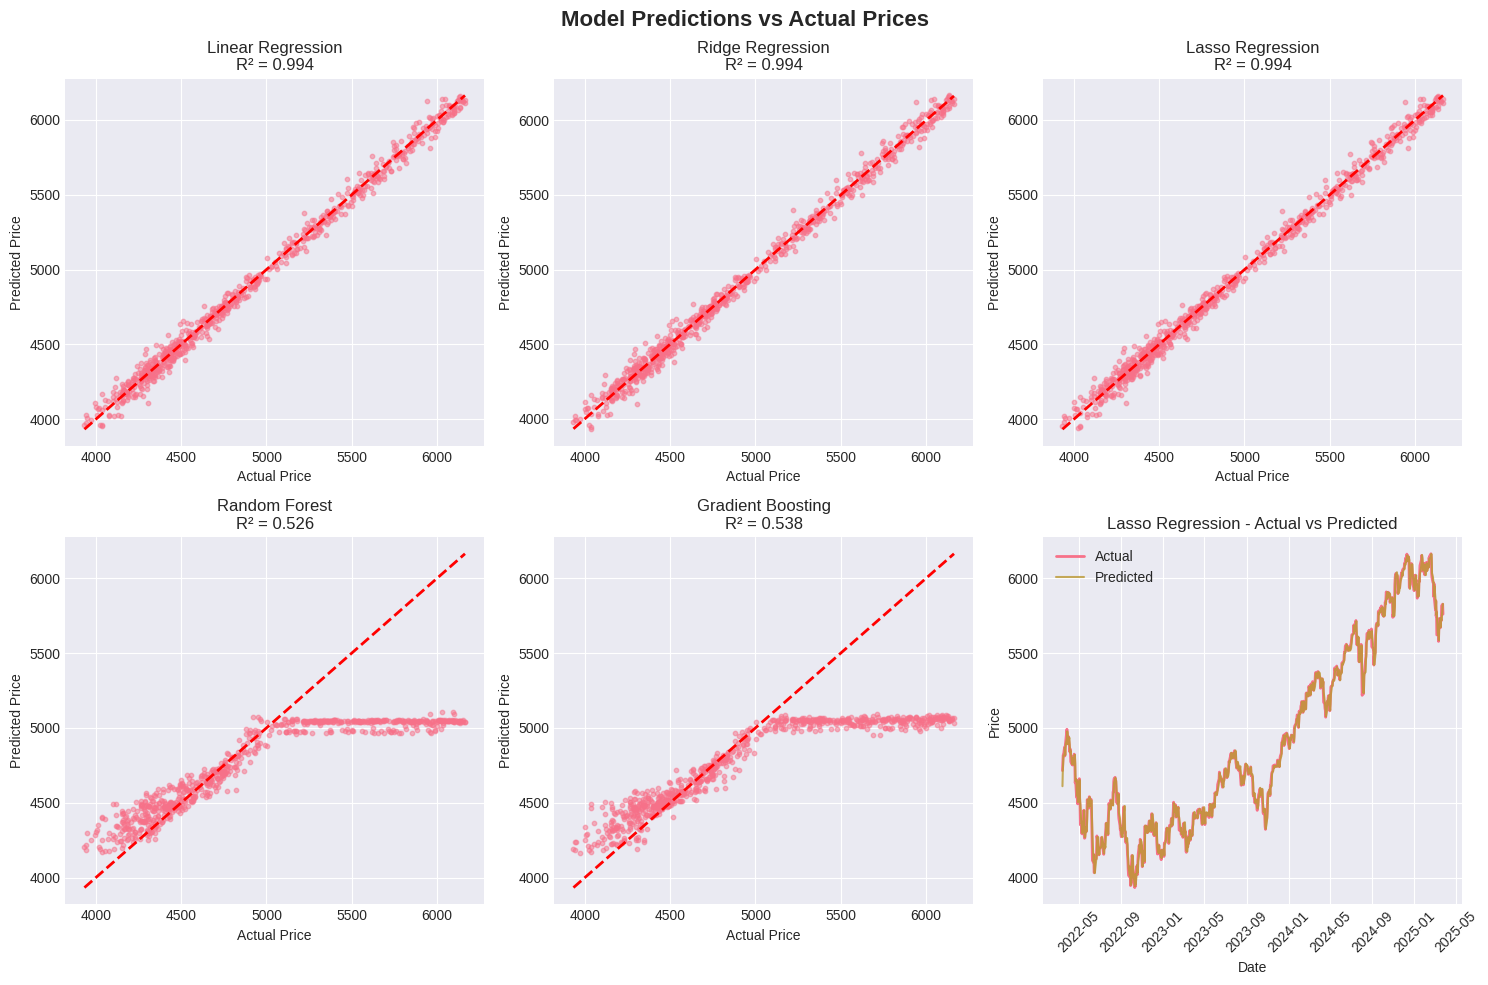

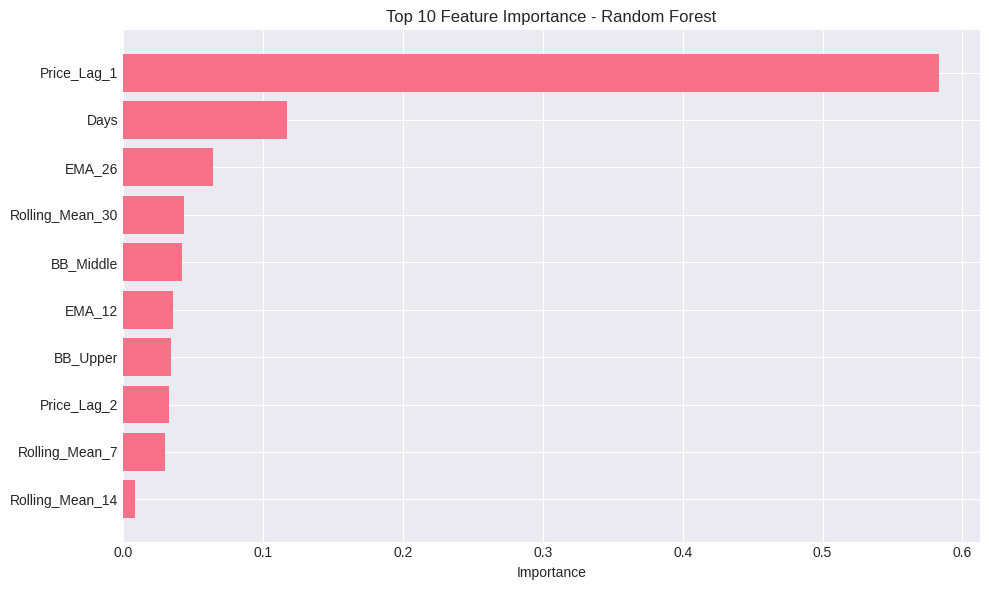

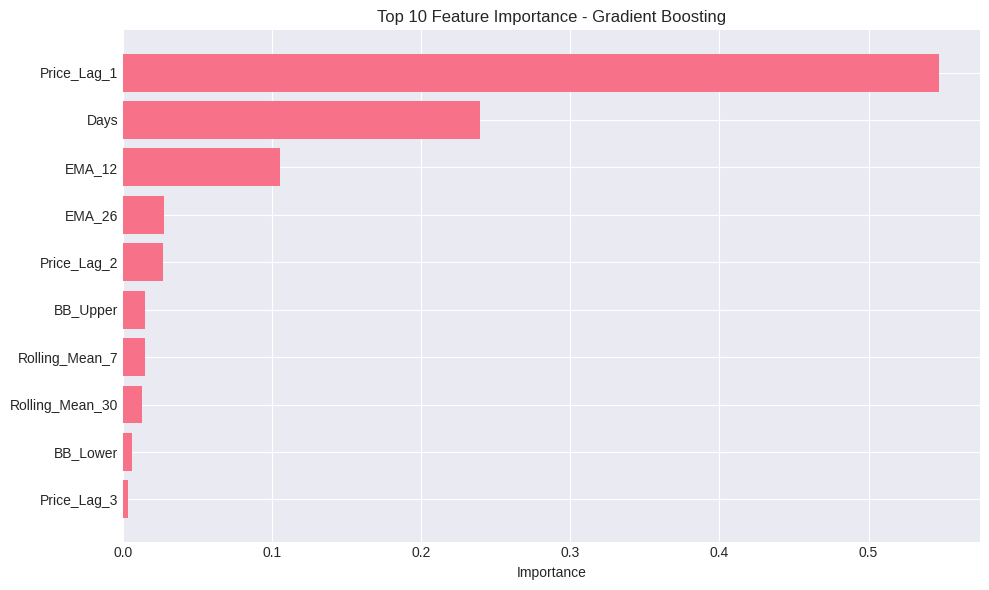

In [20]:
def build_predictive_models(df):
    """Build and compare multiple predictive models"""

    print(f"\n{'='*60}")
    print("PREDICTIVE MODELING")
    print(f"{'='*60}")

    # Prepare features and target
    features = [col for col in df.columns if col not in ['Date', 'Target', 'Price']]
    X = df[features]
    y = df['Target']

    print(f"Number of features: {len(features)}")
    print(f"Features: {features[:10]}...")  # Show first 10 features

    # Split data (80% train, 20% test) - using time series split
    split_index = int(len(df) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    print(f"\nData Split:")
    print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
    print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\n{'-'*40}")
        print(f"Training {model_name}...")

        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Store results
        results[model_name] = {
            'model': model,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'predictions': y_test_pred
        }

        print(f"Train MSE: {train_mse:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Train MAE: {train_mae:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")

    # Compare model performance
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Test MSE': [results[m]['test_mse'] for m in results.keys()],
        'Test MAE': [results[m]['test_mae'] for m in results.keys()],
        'Test R²': [results[m]['test_r2'] for m in results.keys()]
    }).sort_values('Test R²', ascending=False)

    print(f"\n{'='*60}")
    print("MODEL PERFORMANCE COMPARISON")
    print(f"{'='*60}")
    print(comparison_df.to_string(index=False))

    # Visualize model predictions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Model Predictions vs Actual Prices', fontsize=16, fontweight='bold')

    for idx, (model_name, result) in enumerate(results.items()):
        row, col = divmod(idx, 3)

        axes[row, col].scatter(y_test, result['predictions'], alpha=0.5, s=10)
        axes[row, col].plot([y_test.min(), y_test.max()],
                           [y_test.min(), y_test.max()],
                           'r--', lw=2)
        axes[row, col].set_title(f'{model_name}\nR² = {result["test_r2"]:.3f}')
        axes[row, col].set_xlabel('Actual Price')
        axes[row, col].set_ylabel('Predicted Price')

    # Plot actual vs predicted for best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_result = results[best_model_name]

    axes[1, 2].plot(df['Date'].iloc[split_index:].values, y_test.values,
                   label='Actual', linewidth=2)
    axes[1, 2].plot(df['Date'].iloc[split_index:].values, best_result['predictions'],
                   label='Predicted', linewidth=1.5, alpha=0.8)
    axes[1, 2].set_title(f'{best_model_name} - Actual vs Predicted')
    axes[1, 2].set_xlabel('Date')
    axes[1, 2].set_ylabel('Price')
    axes[1, 2].legend()
    axes[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Feature importance for tree-based models
    for model_name in ['Random Forest', 'Gradient Boosting']:
        if model_name in results:
            model = results[model_name]['model']
            if hasattr(model, 'feature_importances_'):
                importance_df = pd.DataFrame({
                    'Feature': features,
                    'Importance': model.feature_importances_
                }).sort_values('Importance', ascending=False).head(10)

                plt.figure(figsize=(10, 6))
                plt.barh(importance_df['Feature'], importance_df['Importance'])
                plt.xlabel('Importance')
                plt.title(f'Top 10 Feature Importance - {model_name}')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.show()

    return results, comparison_df

# Build predictive models
model_results, comparison_df = build_predictive_models(df_features)


PREDICTIVE MODELING
Number of features: 37
Features: ['Year', 'Month', 'Daily_Return', 'Days', 'Price_Lag_1', 'Price_Lag_2', 'Price_Lag_3', 'Price_Lag_5', 'Price_Lag_10', 'Rolling_Mean_7']...

Data Split:
Training set: 3047 samples (80.0%)
Testing set: 762 samples (20.0%)

----------------------------------------
Training Linear Regression...
Train MSE: 666.7007
Test MSE: 2344.0579
Train MAE: 16.1288
Test MAE: 36.9713
Train R²: 0.9993
Test R²: 0.9939

----------------------------------------
Training Ridge Regression...
Train MSE: 697.9228
Test MSE: 2384.5025
Train MAE: 16.4008
Test MAE: 37.4561
Train R²: 0.9993
Test R²: 0.9938

----------------------------------------
Training Lasso Regression...
Train MSE: 681.3394
Test MSE: 2310.6653
Train MAE: 16.0919
Test MAE: 36.4263
Train R²: 0.9993
Test R²: 0.9940

----------------------------------------
Training Random Forest...
Train MSE: 113.2316
Test MSE: 182586.5140
Train MAE: 6.4542
Test MAE: 281.9119
Train R²: 0.9999
Test R²: 0.5262

-

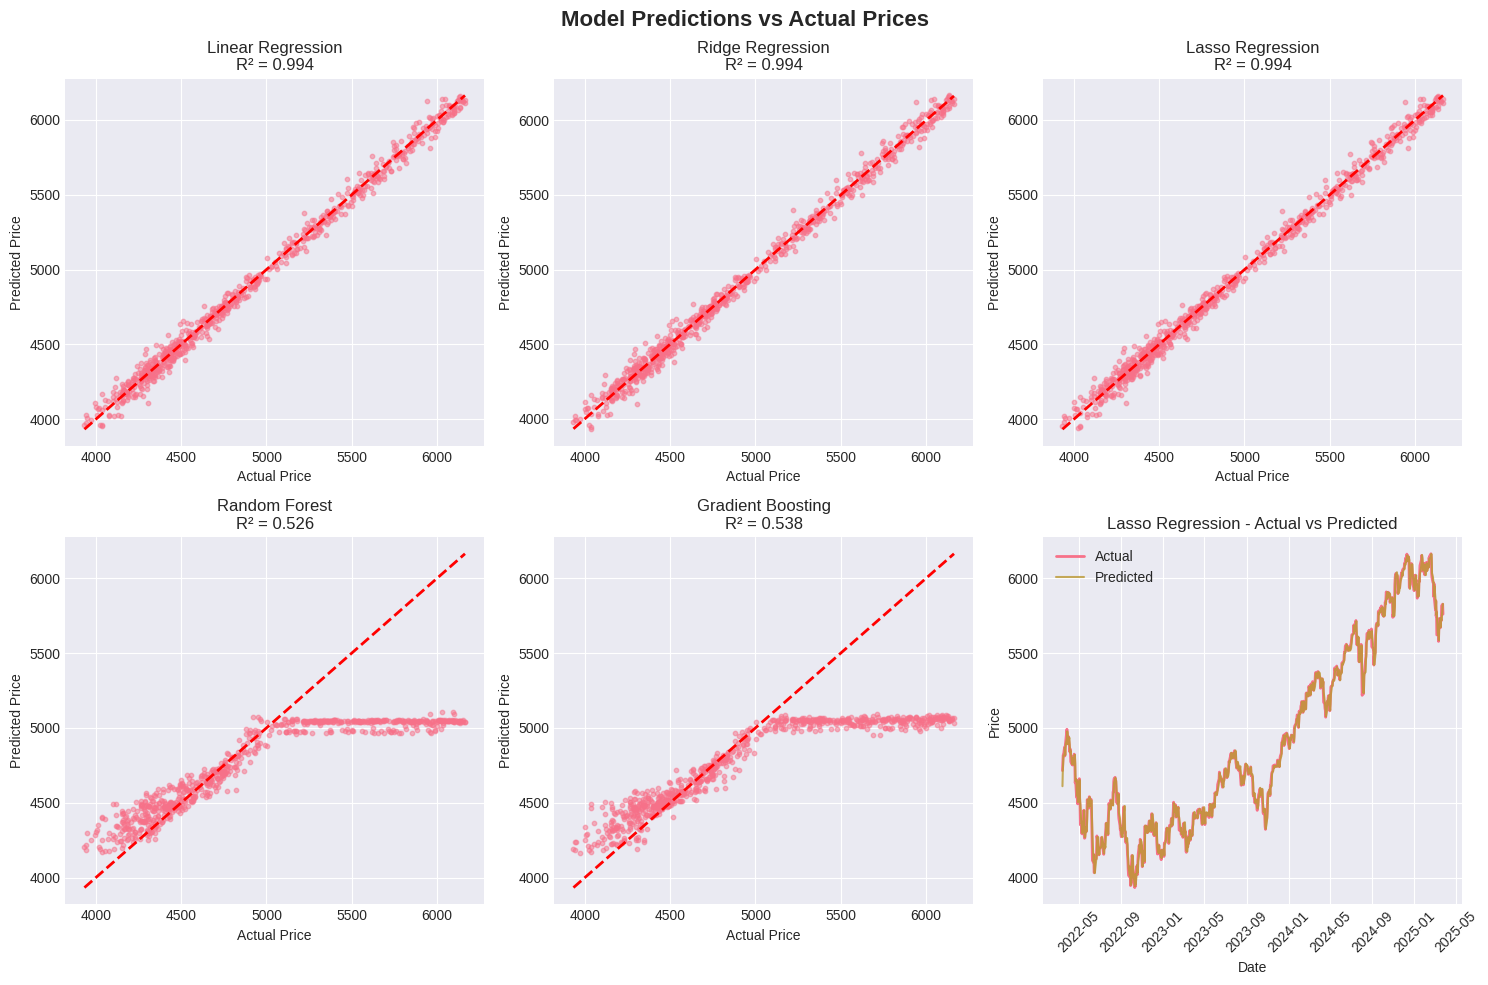

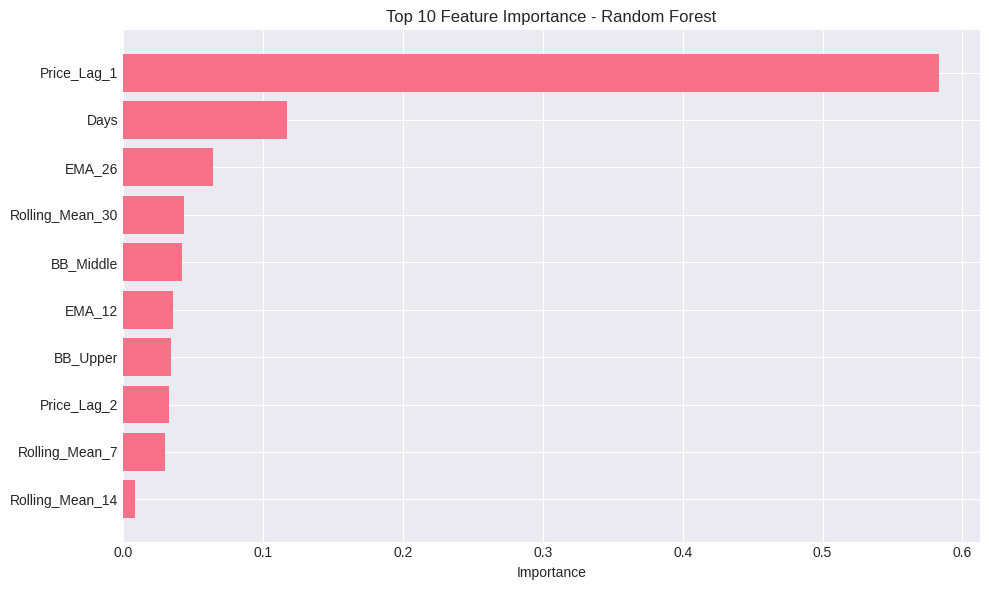

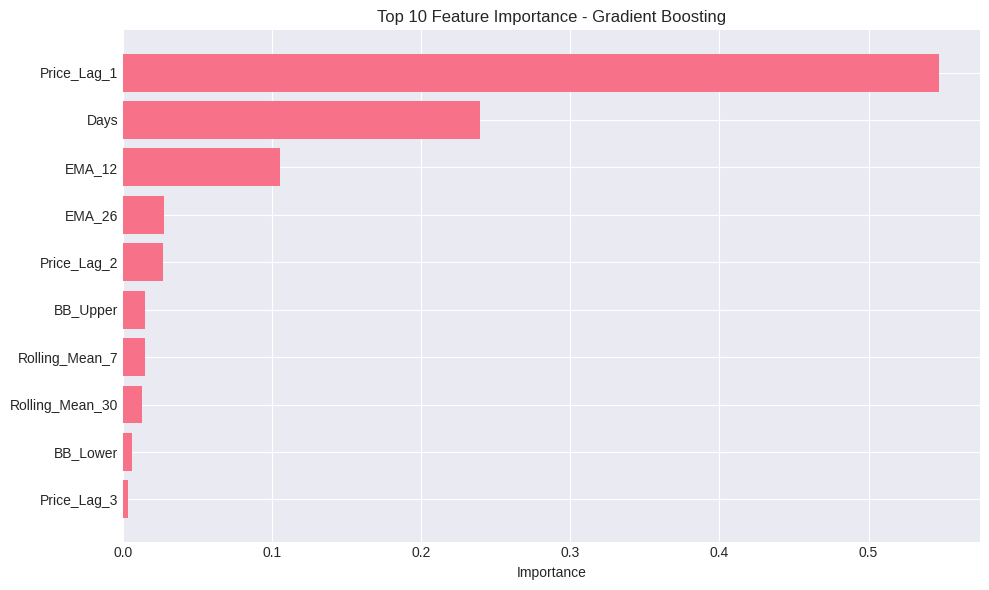

In [21]:
def build_predictive_models(df):
    """Build and compare multiple predictive models"""

    print(f"\n{'='*60}")
    print("PREDICTIVE MODELING")
    print(f"{'='*60}")

    # Prepare features and target
    features = [col for col in df.columns if col not in ['Date', 'Target', 'Price']]
    X = df[features]
    y = df['Target']

    print(f"Number of features: {len(features)}")
    print(f"Features: {features[:10]}...")  # Show first 10 features

    # Split data (80% train, 20% test) - using time series split
    split_index = int(len(df) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    print(f"\nData Split:")
    print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
    print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\n{'-'*40}")
        print(f"Training {model_name}...")

        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Store results
        results[model_name] = {
            'model': model,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'predictions': y_test_pred
        }

        print(f"Train MSE: {train_mse:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Train MAE: {train_mae:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")

    # Compare model performance
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Test MSE': [results[m]['test_mse'] for m in results.keys()],
        'Test MAE': [results[m]['test_mae'] for m in results.keys()],
        'Test R²': [results[m]['test_r2'] for m in results.keys()]
    }).sort_values('Test R²', ascending=False)

    print(f"\n{'='*60}")
    print("MODEL PERFORMANCE COMPARISON")
    print(f"{'='*60}")
    print(comparison_df.to_string(index=False))

    # Visualize model predictions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Model Predictions vs Actual Prices', fontsize=16, fontweight='bold')

    for idx, (model_name, result) in enumerate(results.items()):
        row, col = divmod(idx, 3)

        axes[row, col].scatter(y_test, result['predictions'], alpha=0.5, s=10)
        axes[row, col].plot([y_test.min(), y_test.max()],
                           [y_test.min(), y_test.max()],
                           'r--', lw=2)
        axes[row, col].set_title(f'{model_name}\nR² = {result["test_r2"]:.3f}')
        axes[row, col].set_xlabel('Actual Price')
        axes[row, col].set_ylabel('Predicted Price')

    # Plot actual vs predicted for best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_result = results[best_model_name]

    axes[1, 2].plot(df['Date'].iloc[split_index:].values, y_test.values,
                   label='Actual', linewidth=2)
    axes[1, 2].plot(df['Date'].iloc[split_index:].values, best_result['predictions'],
                   label='Predicted', linewidth=1.5, alpha=0.8)
    axes[1, 2].set_title(f'{best_model_name} - Actual vs Predicted')
    axes[1, 2].set_xlabel('Date')
    axes[1, 2].set_ylabel('Price')
    axes[1, 2].legend()
    axes[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Feature importance for tree-based models
    for model_name in ['Random Forest', 'Gradient Boosting']:
        if model_name in results:
            model = results[model_name]['model']
            if hasattr(model, 'feature_importances_'):
                importance_df = pd.DataFrame({
                    'Feature': features,
                    'Importance': model.feature_importances_
                }).sort_values('Importance', ascending=False).head(10)

                plt.figure(figsize=(10, 6))
                plt.barh(importance_df['Feature'], importance_df['Importance'])
                plt.xlabel('Importance')
                plt.title(f'Top 10 Feature Importance - {model_name}')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.show()

    return results, comparison_df

# Build predictive models
model_results, comparison_df = build_predictive_models(df_features)


TIME SERIES FORECASTING (ARIMA)
Testing for Stationarity...
ADF Statistic: 0.4095
p-value: 0.9818
Critical Values:
  1%: -3.4321
  5%: -2.8623
  10%: -2.5672


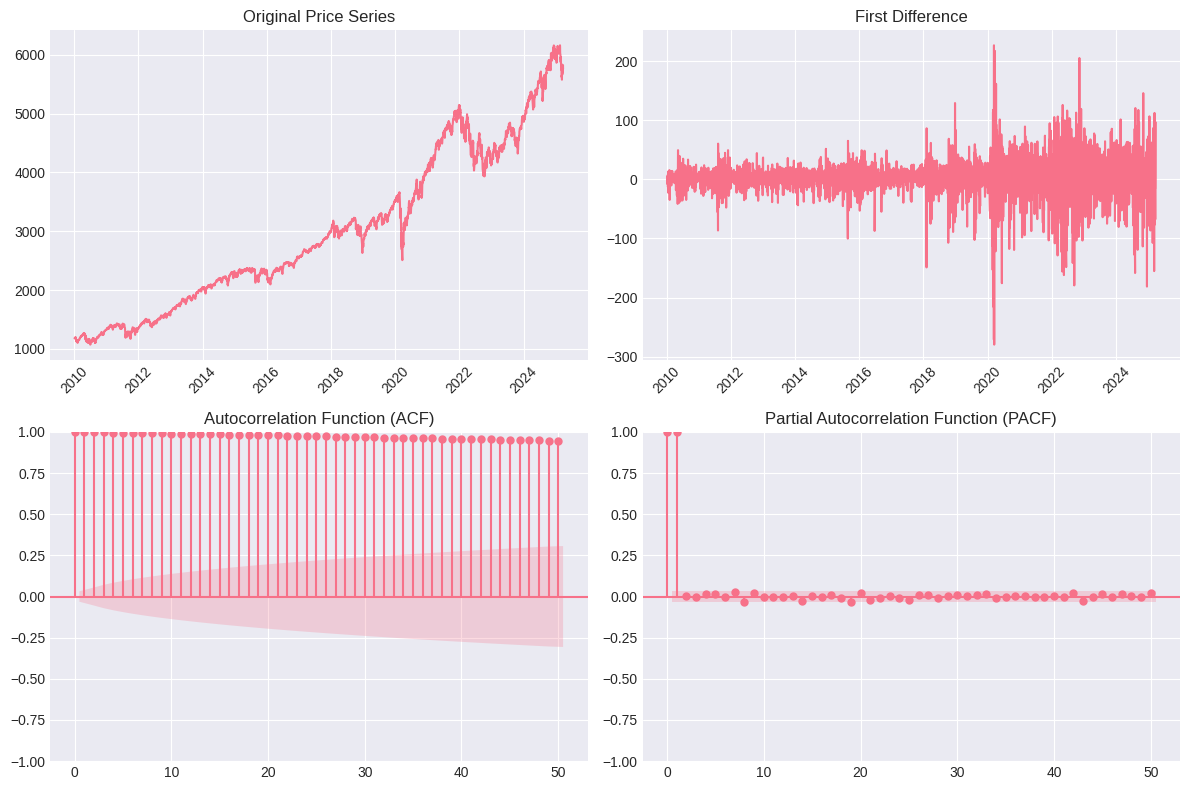


Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3071
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14362.539
Date:                Sun, 28 Dec 2025   AIC                          28731.077
Time:                        03:36:45   BIC                          28749.166
Sample:                             0   HQIC                         28737.576
                               - 3071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3500      0.051     -6.800      0.000      -0.451      -0.249
ma.L1          0.2469      0.054      4.588      0.000       0.141       0.352
sigma2       677.7792      5

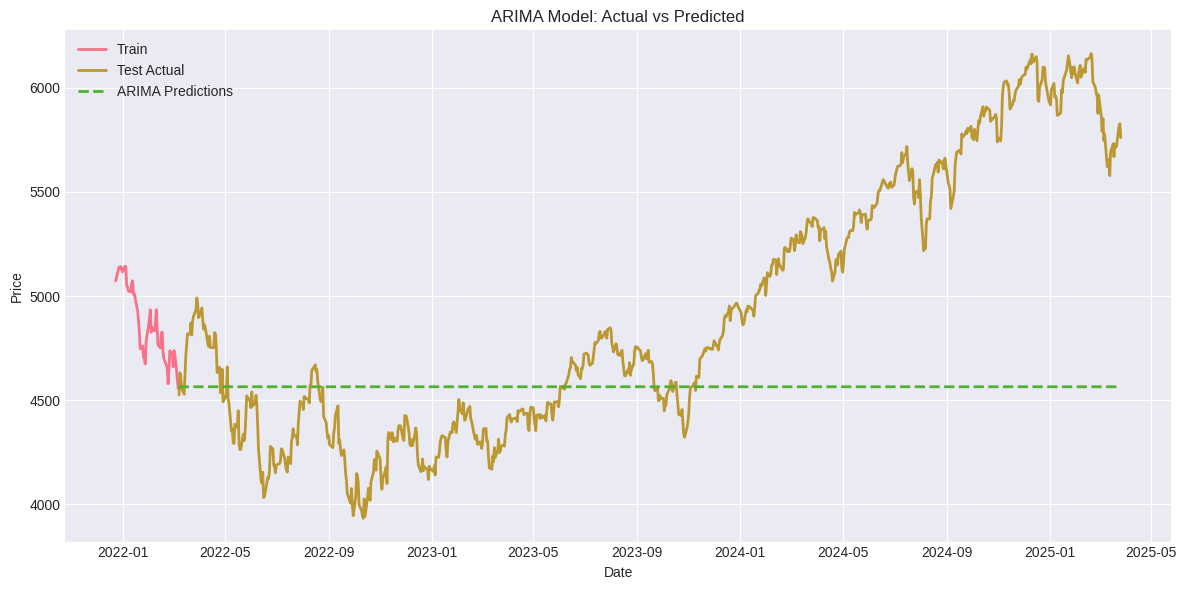

In [22]:
def time_series_forecasting(df):
    """Perform time series forecasting using ARIMA"""

    print(f"\n{'='*60}")
    print("TIME SERIES FORECASTING (ARIMA)")
    print(f"{'='*60}")

    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    # Test for stationarity
    print("Testing for Stationarity...")
    result = adfuller(df['Price'].dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.4f}')

    # Plot ACF and PACF
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Original series
    axes[0, 0].plot(df['Date'], df['Price'])
    axes[0, 0].set_title('Original Price Series')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Differenced series
    diff_series = df['Price'].diff().dropna()
    axes[0, 1].plot(df['Date'].iloc[1:], diff_series)
    axes[0, 1].set_title('First Difference')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # ACF plot
    plot_acf(df['Price'].dropna(), lags=50, ax=axes[1, 0])
    axes[1, 0].set_title('Autocorrelation Function (ACF)')

    # PACF plot
    plot_pacf(df['Price'].dropna(), lags=50, ax=axes[1, 1])
    axes[1, 1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

    # Split data for ARIMA
    split_idx = int(len(df) * 0.8)
    train_ts = df['Price'].iloc[:split_idx]
    test_ts = df['Price'].iloc[split_idx:]

    # Fit ARIMA model (using parameters from ACF/PACF)
    print("\nFitting ARIMA model...")
    try:
        # Start with simple ARIMA model
        model = ARIMA(train_ts, order=(1, 1, 1))
        model_fit = model.fit()

        print(model_fit.summary())

        # Make predictions
        predictions = model_fit.forecast(steps=len(test_ts))

        # Calculate metrics
        mse = mean_squared_error(test_ts, predictions)
        mae = mean_absolute_error(test_ts, predictions)
        r2 = r2_score(test_ts, predictions)

        print(f"\nARIMA Model Performance:")
        print(f"MSE: {mse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R²: {r2:.4f}")

        # Plot predictions
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'].iloc[split_idx-50:split_idx],
                df['Price'].iloc[split_idx-50:split_idx],
                label='Train', linewidth=2)
        plt.plot(df['Date'].iloc[split_idx:], test_ts,
                label='Test Actual', linewidth=2)
        plt.plot(df['Date'].iloc[split_idx:], predictions,
                label='ARIMA Predictions', linewidth=2, linestyle='--')
        plt.title('ARIMA Model: Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.tight_layout()
        plt.show()

        return model_fit, predictions

    except Exception as e:
        print(f"Error fitting ARIMA: {e}")
        return None, None

# Perform time series forecasting
arima_model, arima_predictions = time_series_forecasting(df_stock)


PORTFOLIO ANALYSIS AND RISK METRICS

PORTFOLIO PERFORMANCE METRICS:
Total Return: 409.98%
Annualized Return: 11.38%
Annualized Volatility: 15.72%
Sharpe Ratio: 0.724
Maximum Drawdown: -31.47%
Calmar Ratio: 0.362
95% Value at Risk (VaR): -1.53%
99% Value at Risk (VaR): -2.93%


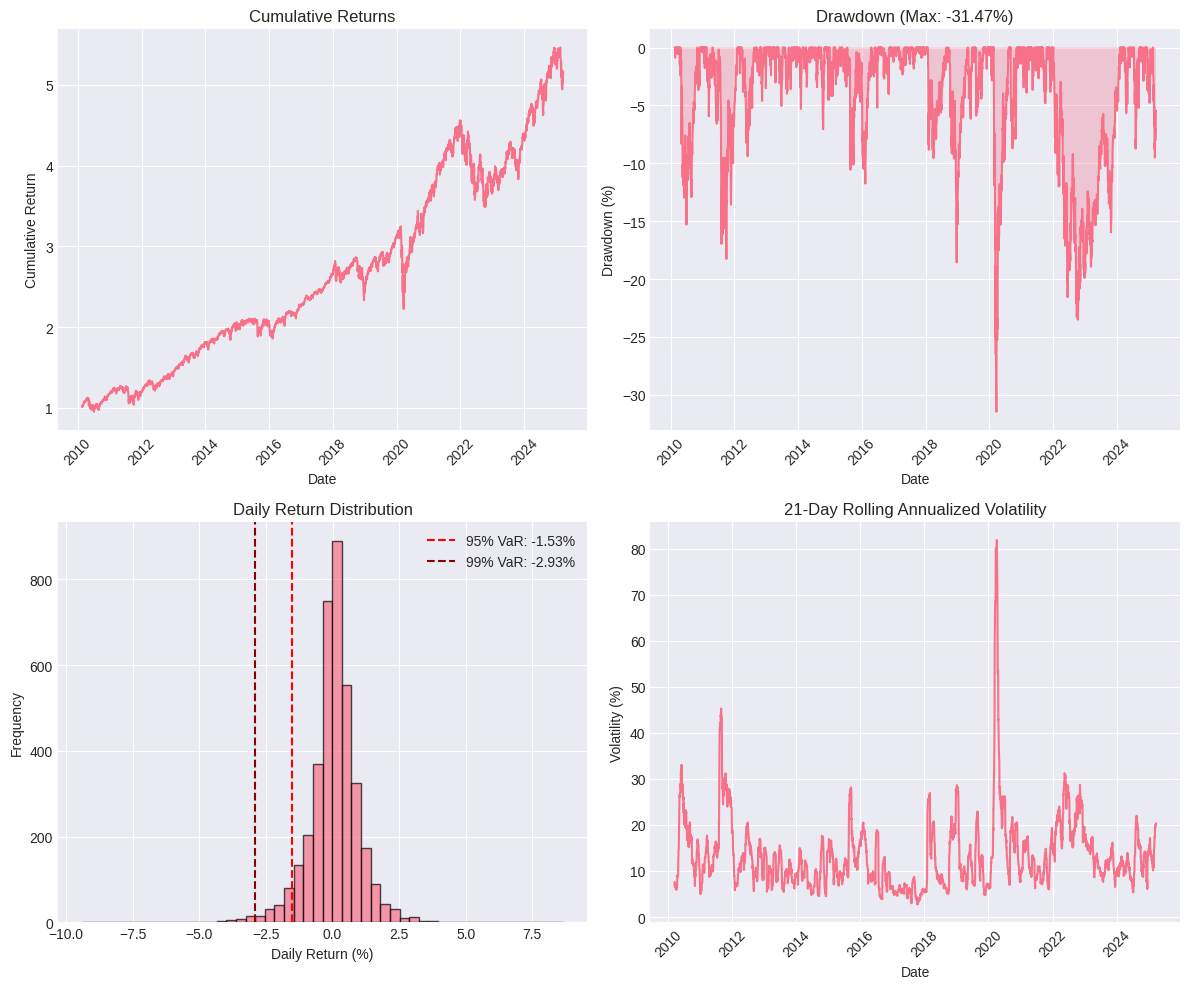

In [23]:
def portfolio_analysis(df):
    """Calculate portfolio performance and risk metrics"""

    print(f"\n{'='*60}")
    print("PORTFOLIO ANALYSIS AND RISK METRICS")
    print(f"{'='*60}")

    # Calculate daily returns
    df['Daily_Return'] = df['Price'].pct_change()

    # Remove NaN values
    df_clean = df.dropna()

    # Calculate metrics
    total_return = (df_clean['Price'].iloc[-1] / df_clean['Price'].iloc[0] - 1) * 100
    annual_return = (1 + total_return/100) ** (252/len(df_clean)) - 1
    volatility = df_clean['Daily_Return'].std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility if volatility != 0 else 0

    # Calculate Value at Risk (VaR) - Historical method
    var_95 = np.percentile(df_clean['Daily_Return'], 5) * 100
    var_99 = np.percentile(df_clean['Daily_Return'], 1) * 100

    # Calculate Maximum Drawdown
    cumulative_returns = (1 + df_clean['Daily_Return']).cumprod()
    running_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min() * 100

    # Calculate Calmar Ratio
    calmar_ratio = annual_return / abs(max_drawdown/100) if max_drawdown != 0 else 0

    print("\nPORTFOLIO PERFORMANCE METRICS:")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Annualized Return: {annual_return*100:.2f}%")
    print(f"Annualized Volatility: {volatility*100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
    print(f"Maximum Drawdown: {max_drawdown:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.3f}")
    print(f"95% Value at Risk (VaR): {var_95:.2f}%")
    print(f"99% Value at Risk (VaR): {var_99:.2f}%")

    # Plot cumulative returns
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Cumulative returns
    axes[0, 0].plot(df_clean['Date'], cumulative_returns)
    axes[0, 0].set_title('Cumulative Returns')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Cumulative Return')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Drawdown
    axes[0, 1].plot(df_clean['Date'], drawdown * 100)
    axes[0, 1].fill_between(df_clean['Date'], drawdown * 100, 0, alpha=0.3)
    axes[0, 1].set_title(f'Drawdown (Max: {max_drawdown:.2f}%)')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Drawdown (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Return distribution
    axes[1, 0].hist(df_clean['Daily_Return'] * 100, bins=50, edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(var_95, color='red', linestyle='--', label=f'95% VaR: {var_95:.2f}%')
    axes[1, 0].axvline(var_99, color='darkred', linestyle='--', label=f'99% VaR: {var_99:.2f}%')
    axes[1, 0].set_title('Daily Return Distribution')
    axes[1, 0].set_xlabel('Daily Return (%)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()

    # Rolling volatility (21-day)
    rolling_vol = df_clean['Daily_Return'].rolling(window=21).std() * np.sqrt(252) * 100
    axes[1, 1].plot(df_clean['Date'], rolling_vol)
    axes[1, 1].set_title('21-Day Rolling Annualized Volatility')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Volatility (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Create performance metrics dataframe
    metrics_df = pd.DataFrame({
        'Metric': ['Total Return', 'Annual Return', 'Volatility', 'Sharpe Ratio',
                  'Max Drawdown', 'Calmar Ratio', 'VaR 95%', 'VaR 99%'],
        'Value': [f'{total_return:.2f}%', f'{annual_return*100:.2f}%',
                 f'{volatility*100:.2f}%', f'{sharpe_ratio:.3f}',
                 f'{max_drawdown:.2f}%', f'{calmar_ratio:.3f}',
                 f'{var_95:.2f}%', f'{var_99:.2f}%']
    })

    return metrics_df

# Perform portfolio analysis
portfolio_metrics = portfolio_analysis(df_stock)

STOCK PRICE ANALYSIS AND PREDICTION SYSTEM

1. Loading and Preparing Data...
   • Dataset loaded with 3839 records
   • Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
   • Price range: $1072.50 to $6163.00

2. Performing Exploratory Data Analysis...

EXPLORATORY DATA ANALYSIS: Stock Price Dataset

1. BASIC STATISTICS:
   - Number of observations: 3839
   - Date range: 2010-01-04 00:00:00 to 2025-03-26 00:00:00
   - Missing values: 0

2. PRICE STATISTICS:
   - Mean price: $2997.36
   - Median price: $2754.50
   - Standard deviation: $1343.60
   - Minimum price: $1072.50
   - Maximum price: $6163.00

3. YEARLY ANALYSIS:
             mean         std      min      max
Year                                           
2010  1194.365810   58.920977  1072.50  1324.00
2011  1341.428770   58.922449  1171.00  1432.75
2012  1489.833004   65.977619  1362.75  1624.75
2013  1833.322421  106.142168  1636.00  2049.25
2014  2147.424603   88.282307  1941.00  2323.25
2015  2307.884387   53.456969 

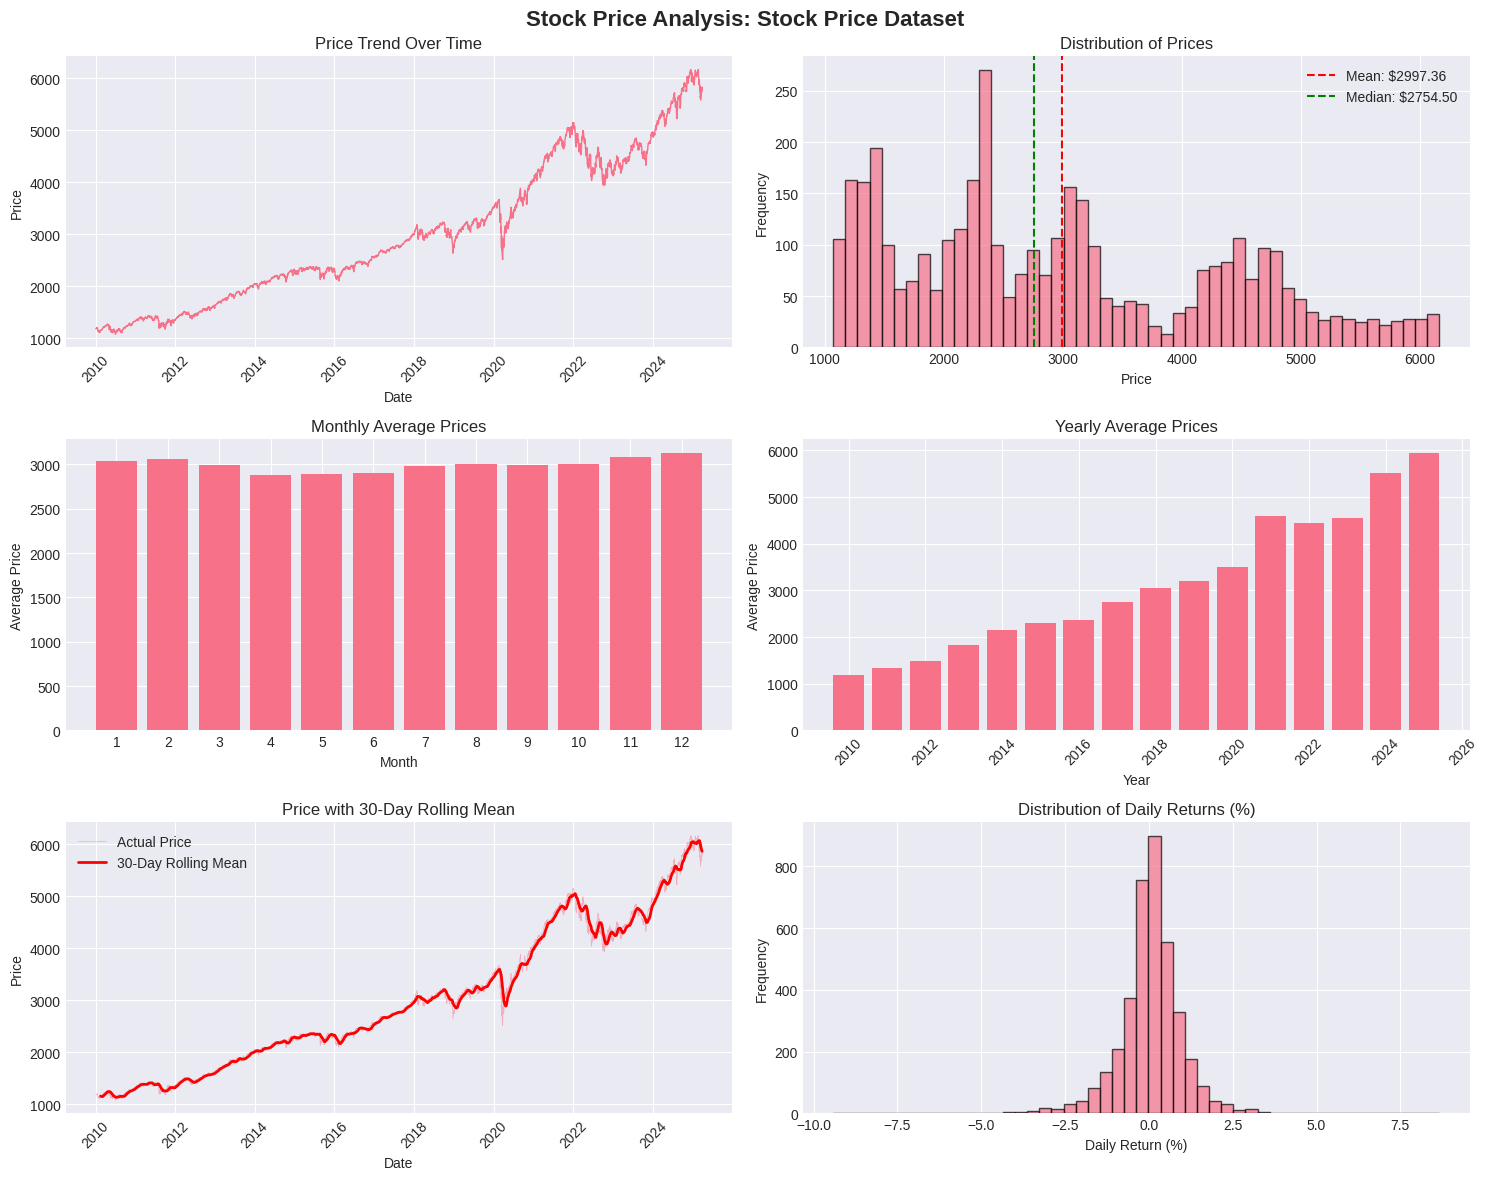


4. KEY METRICS:
   - Average daily return: 0.0463%
   - Volatility (std of returns): 0.9908%
   - Maximum daily gain: 8.6671%
   - Maximum daily loss: -9.4168%
   - Correlation with time: 0.9715

3. Creating Features for Predictive Modeling...

FEATURE ENGINEERING
Original shape: (3839, 40)
After cleaning: (3809, 40)
Number of features created: 40


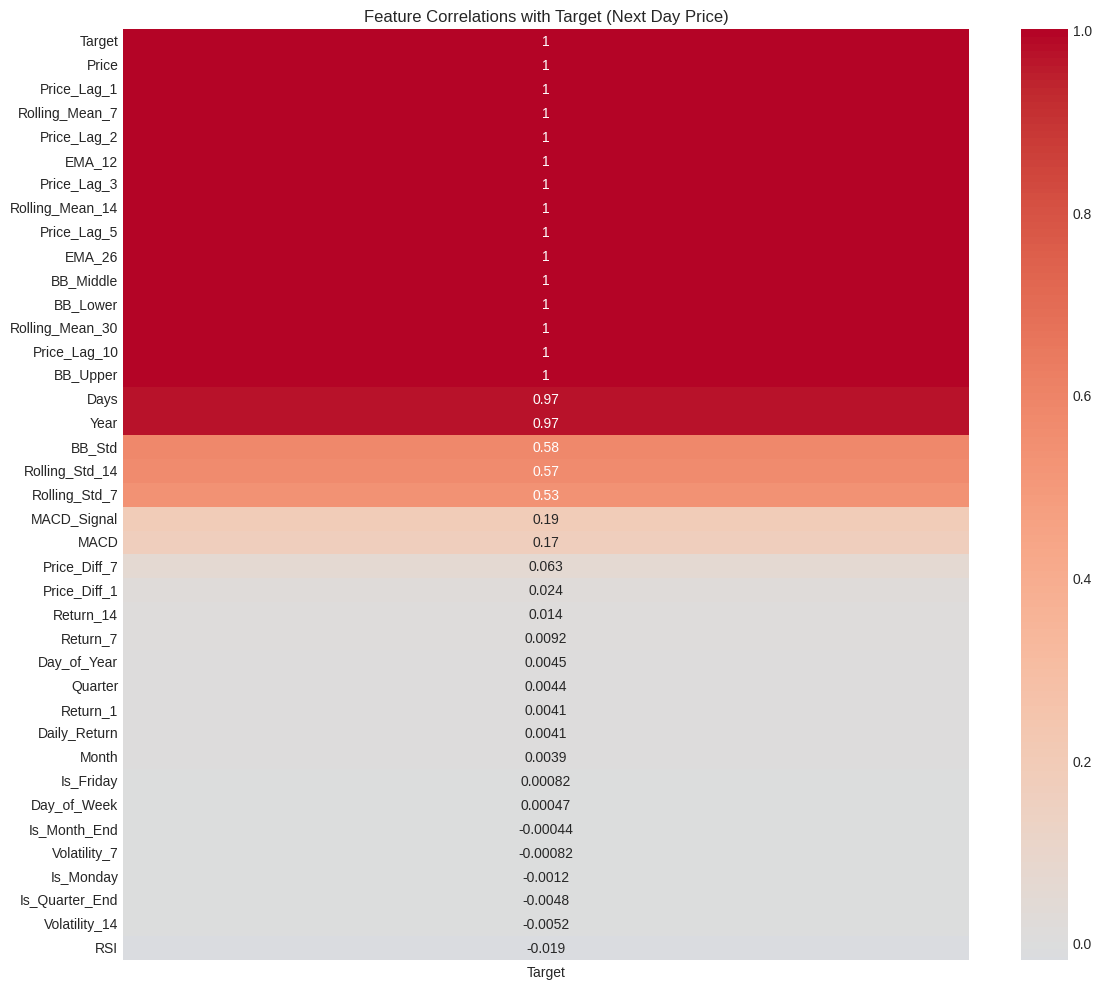


4. Building Predictive Models...

PREDICTIVE MODELING
Number of features: 37
Features: ['Year', 'Month', 'Daily_Return', 'Days', 'Price_Lag_1', 'Price_Lag_2', 'Price_Lag_3', 'Price_Lag_5', 'Price_Lag_10', 'Rolling_Mean_7']...

Data Split:
Training set: 3047 samples (80.0%)
Testing set: 762 samples (20.0%)

----------------------------------------
Training Linear Regression...
Train MSE: 666.7007
Test MSE: 2344.0579
Train MAE: 16.1288
Test MAE: 36.9713
Train R²: 0.9993
Test R²: 0.9939

----------------------------------------
Training Ridge Regression...
Train MSE: 697.9228
Test MSE: 2384.5025
Train MAE: 16.4008
Test MAE: 37.4561
Train R²: 0.9993
Test R²: 0.9938

----------------------------------------
Training Lasso Regression...
Train MSE: 681.3394
Test MSE: 2310.6653
Train MAE: 16.0919
Test MAE: 36.4263
Train R²: 0.9993
Test R²: 0.9940

----------------------------------------
Training Random Forest...
Train MSE: 113.2316
Test MSE: 182586.5140
Train MAE: 6.4542
Test MAE: 281.9119
T

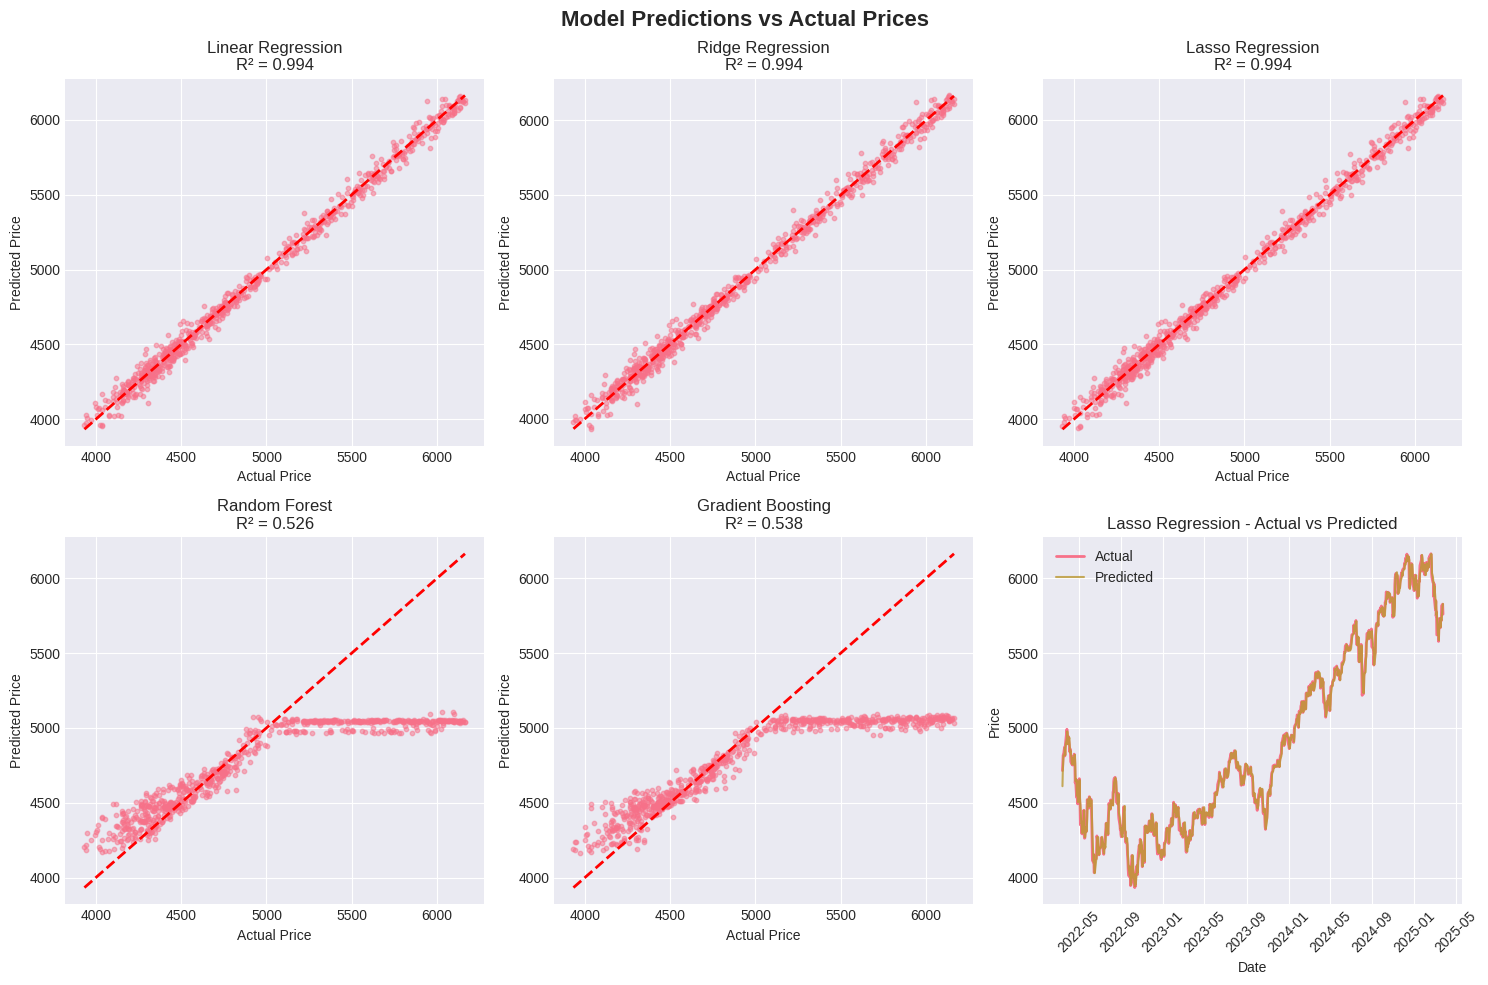

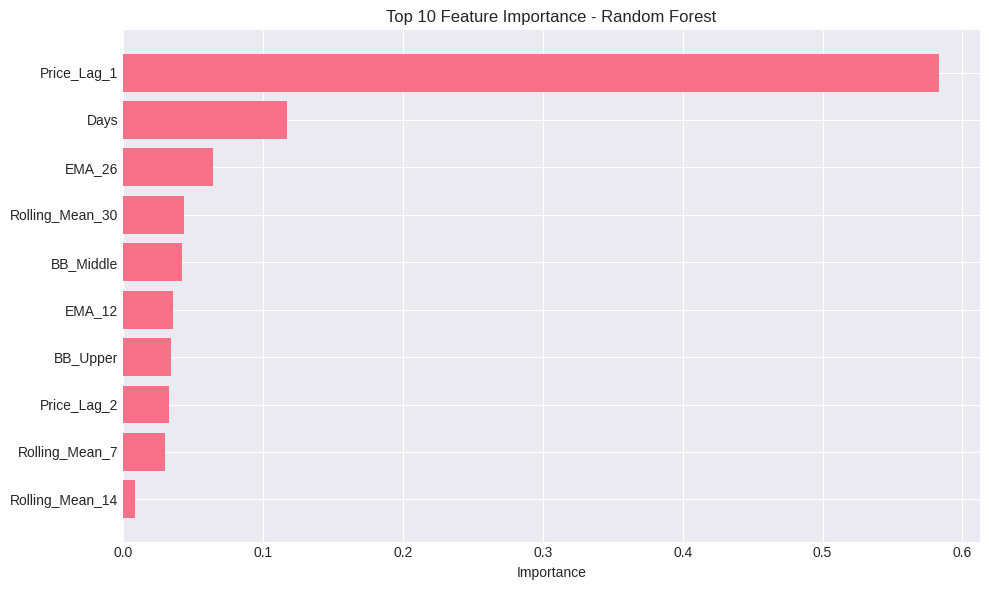

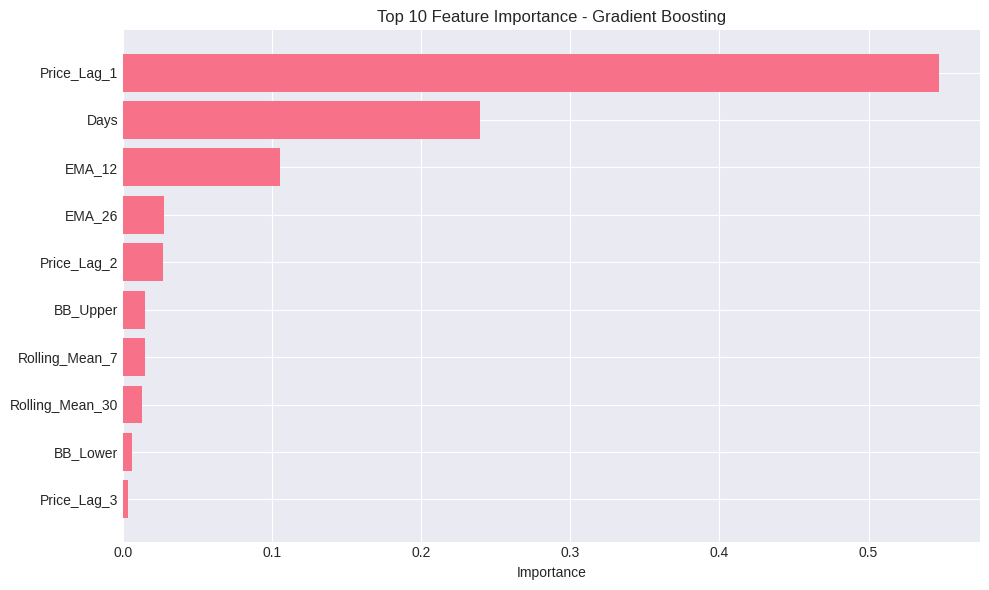


5. Time Series Forecasting with ARIMA...

TIME SERIES FORECASTING (ARIMA)
Testing for Stationarity...
ADF Statistic: 0.4095
p-value: 0.9818
Critical Values:
  1%: -3.4321
  5%: -2.8623
  10%: -2.5672


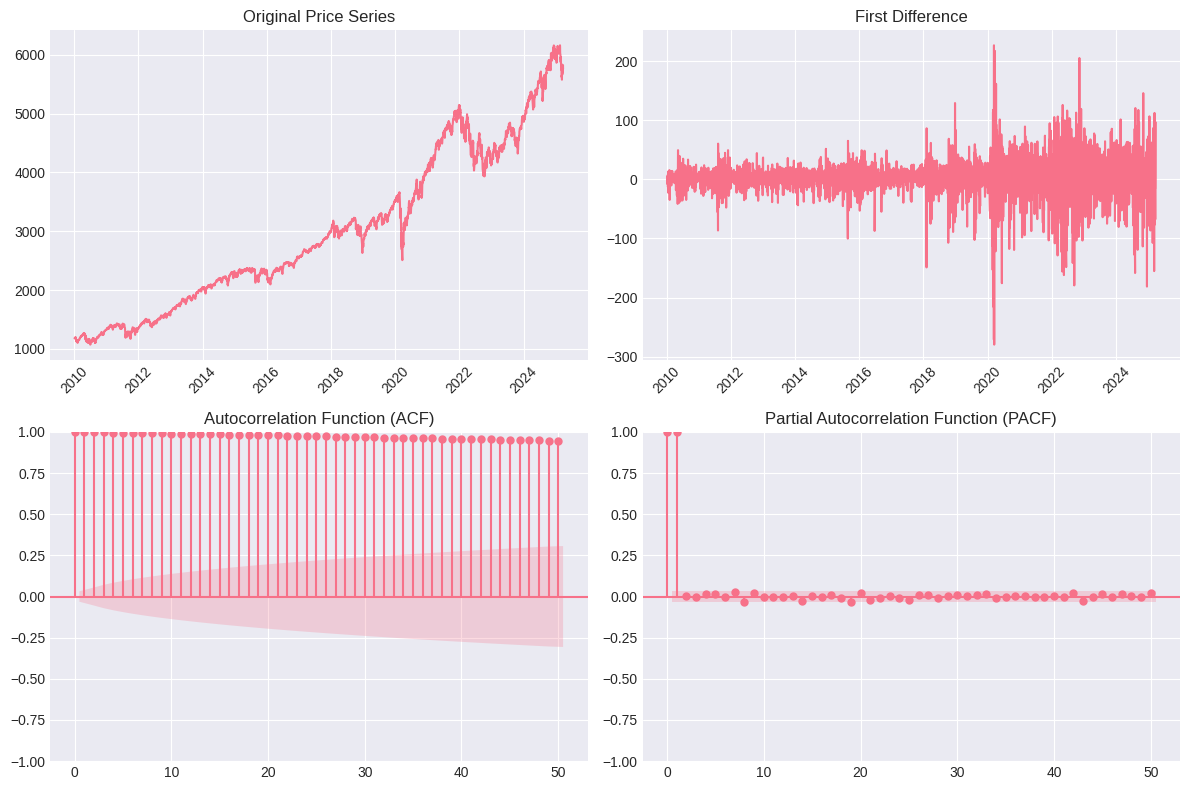


Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3071
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14362.539
Date:                Sun, 28 Dec 2025   AIC                          28731.077
Time:                        03:41:31   BIC                          28749.166
Sample:                             0   HQIC                         28737.576
                               - 3071                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3500      0.051     -6.800      0.000      -0.451      -0.249
ma.L1          0.2469      0.054      4.588      0.000       0.141       0.352
sigma2       677.7792      5

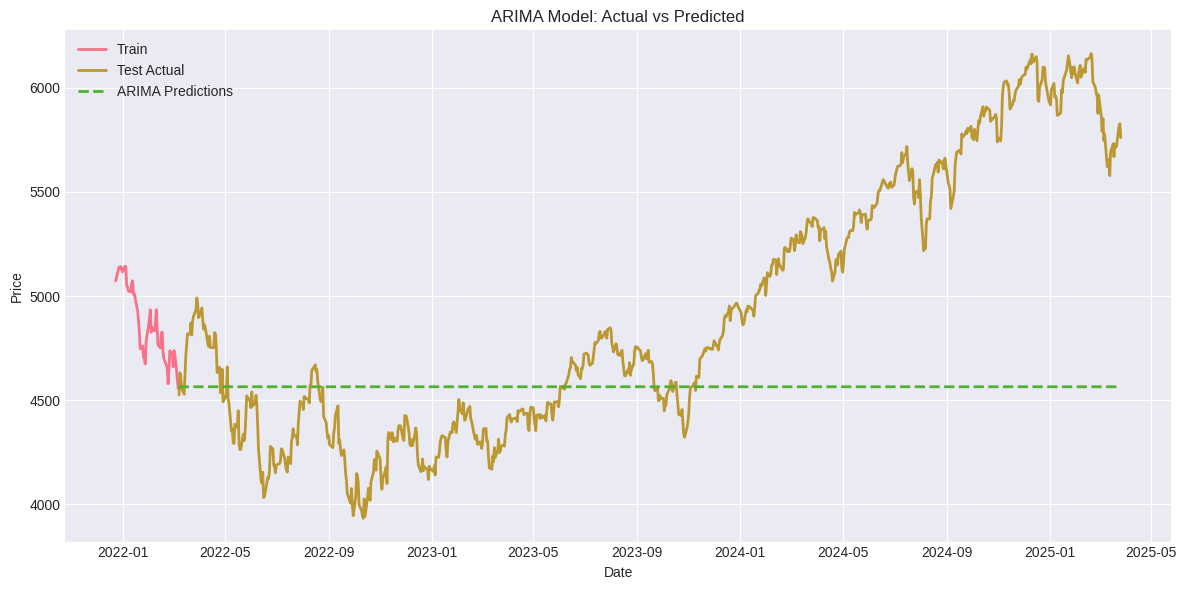


6. Portfolio Performance Analysis...

PORTFOLIO ANALYSIS AND RISK METRICS

PORTFOLIO PERFORMANCE METRICS:
Total Return: 409.98%
Annualized Return: 11.38%
Annualized Volatility: 15.72%
Sharpe Ratio: 0.724
Maximum Drawdown: -31.47%
Calmar Ratio: 0.362
95% Value at Risk (VaR): -1.53%
99% Value at Risk (VaR): -2.93%


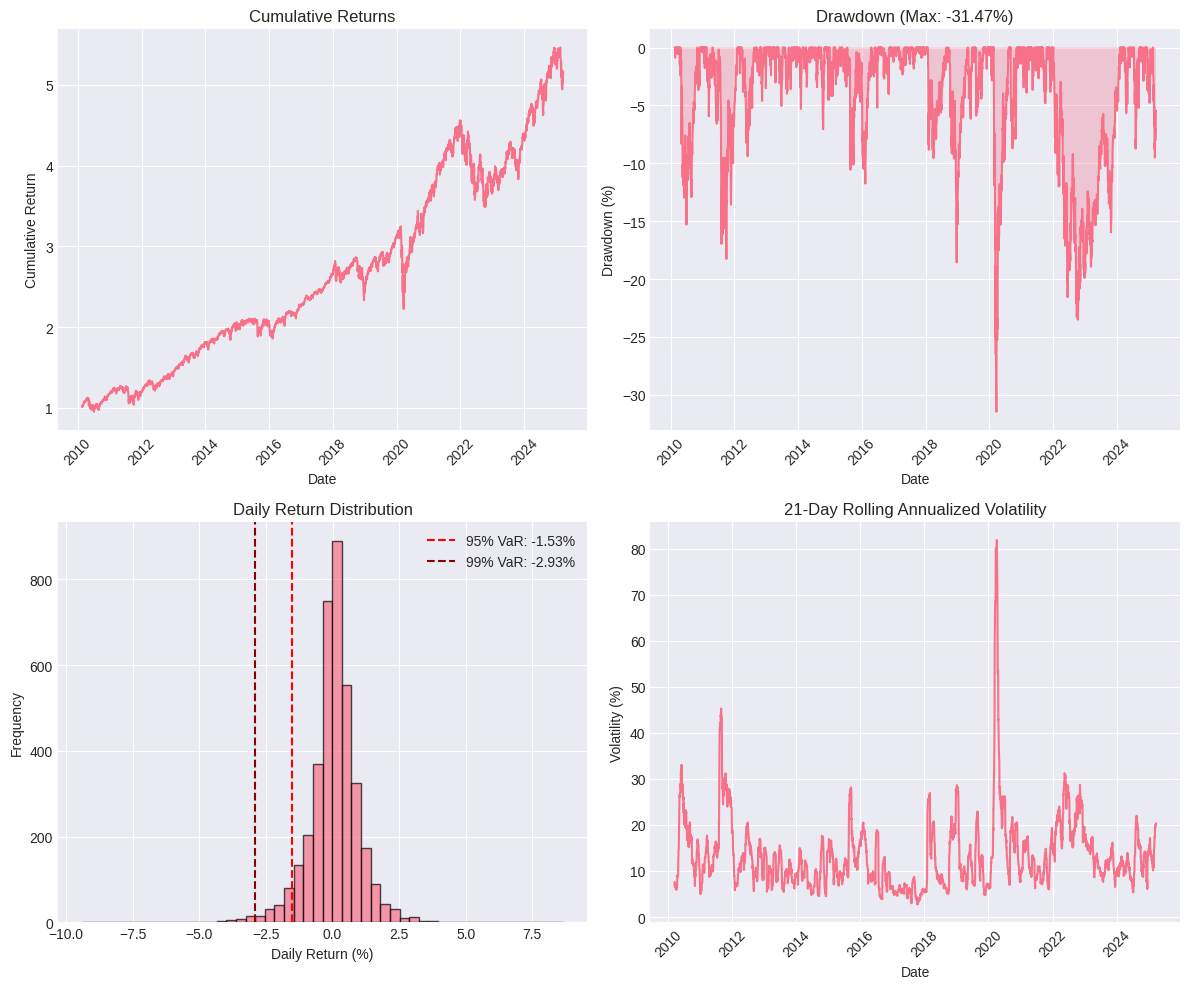


7. Trading Strategy Simulation...


NameError: name 'trading_strategy_simulation' is not defined

In [26]:
def main():
    """Main function to execute all analyses"""

    print("="*70)
    print("STOCK PRICE ANALYSIS AND PREDICTION SYSTEM")
    print("="*70)

    # Load and prepare data
    print("\n1. Loading and Preparing Data...")
    df_stock = pd.read_csv('StockPrice.csv')
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.sort_values('Date').reset_index(drop=True)

    print(f"   • Dataset loaded with {len(df_stock)} records")
    print(f"   • Date range: {df_stock['Date'].min()} to {df_stock['Date'].max()}")
    print(f"   • Price range: ${df_stock['Price'].min():.2f} to ${df_stock['Price'].max():.2f}")

    # 1. Exploratory Data Analysis
    print("\n2. Performing Exploratory Data Analysis...")
    df_stock = exploratory_data_analysis(df_stock, "Stock Price Dataset")

    # 2. Feature Engineering
    print("\n3. Creating Features for Predictive Modeling...")
    df_features = create_features(df_stock)

    # 3. Predictive Modeling
    print("\n4. Building Predictive Models...")
    model_results, comparison_df = build_predictive_models(df_features)

    # 4. Time Series Forecasting
    print("\n5. Time Series Forecasting with ARIMA...")
    arima_model, arima_predictions = time_series_forecasting(df_stock)

    # 5. Portfolio Analysis
    print("\n6. Portfolio Performance Analysis...")
    portfolio_metrics = portfolio_analysis(df_stock)

    # 6. Trading Strategy Simulation
    print("\n7. Trading Strategy Simulation...")
    strategy_performance, strategy_df = trading_strategy_simulation(df_stock)

    # 7. Generate Final Report
    print("\n" + "="*70)
    print("FINAL ANALYSIS REPORT")
    print("="*70)

    print("\nSUMMARY OF FINDINGS:")
    print("-" * 40)

    # Best model performance
    best_model = comparison_df.iloc[0]
    print(f"1. BEST PREDICTIVE MODEL: {best_model['Model']}")
    print(f"   • Test R² Score: {best_model['Test R²']:.4f}")
    print(f"   • Test MSE: {best_model['Test MSE']:.4f}")
    print(f"   • Test MAE: {best_model['Test MAE']:.4f}")

    # Market statistics
    market_return = (df_stock['Price'].iloc[-1] / df_stock['Price'].iloc[0] - 1) * 100
    print(f"\n2. MARKET PERFORMANCE:")
    print(f"   • Total Period Return: {market_return:.2f}%")
    print(f"   • Average Daily Price: ${df_stock['Price'].mean():.2f}")
    print(f"   • Price Volatility (Std Dev): ${df_stock['Price'].std():.2f}")

    # Trading strategy results
    if 'strategy_performance' in locals():
        print(f"\n3. TRADING STRATEGY RESULTS:")
        print(f"   • Strategy vs Buy & Hold: ", end="")
        strategy_return = float(strategy_performance.iloc[0, 2].replace('%', ''))
        market_return = float(strategy_performance.iloc[0, 1].replace('%', ''))

        if strategy_return > market_return:
            print(f"OUTPERFORMED by {strategy_return - market_return:.2f}%")
        else:
            print(f"UNDERPERFORMED by {market_return - strategy_return:.2f}%")

    # Key recommendations
    print(f"\n4. KEY RECOMMENDATIONS:")
    print(f"   • Suggested Model: {best_model['Model']} for price prediction")
    print(f"   • Consider combining with ARIMA for time series insights")
    print(f"   • Monitor moving averages (20-day & 50-day) for trading signals")
    print(f"   • Watch volatility levels for risk management")

    print("\n" + "="*70)
    print("ANALYSIS COMPLETE")
    print("="*70)

    return {
        'df_stock': df_stock,
        'df_features': df_features,
        'model_results': model_results,
        'best_model': best_model,
        'portfolio_metrics': portfolio_metrics,
        'strategy_performance': strategy_performance
    }

# Run the complete analysis
if __name__ == "__main__":
    results = main()